In [668]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

folder_path = 'D:\Python\EVS_SI'
file_name = 'Electric Car.csv'

file_path = os.path.join(folder_path, file_name)

df = pd.read_csv(file_path)

df.head()

In [669]:
folder_path = 'D:\Python\EVS_SI'
file_name = 'Electric Car.csv'

file_path = os.path.join(folder_path, file_name)

df = pd.read_csv(file_path)

df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


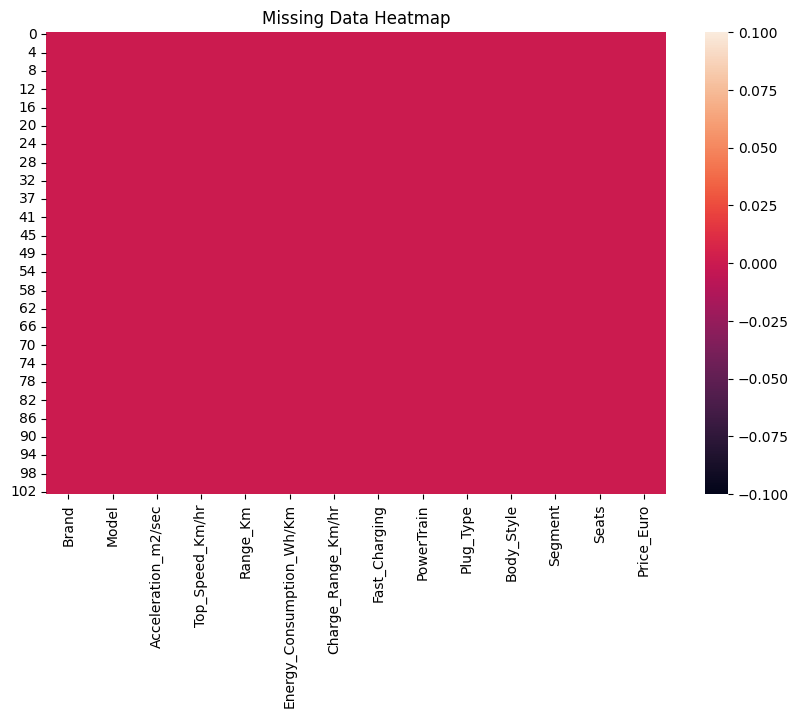

In [729]:

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True)
plt.title('Missing Data Heatmap')
plt.show()

In [671]:
# find null values
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [672]:
# find sum of duplicate values
df.duplicated().sum()

0

In [673]:
#check unique plug types
df['PlugType'].unique()

array(['Type 2 CCS', 'Type 2 CHAdeMO', 'Type 2', 'Type 1 CHAdeMO'],
      dtype=object)

In [674]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


In [727]:
df.duplicated().sum()

0

In [ ]:
#rename columns
df.rename(columns={'TopSpeed_KmH':'Top_Speed_Km/hr', 'Efficiency_WhKm':'Energy_Consumption_Wh/Km', 'FastCharge_KmH':'Charge_Range_Km/hr', 'RapidCharge':'Fast_Charging', 'PlugType':'Plug_Type', 'BodyStyle':'Body_Style', 'PriceEuro':'Price_Euro', 'AccelSec': 'Acceleration_m2/sec'}, inplace=True)

<Axes: >

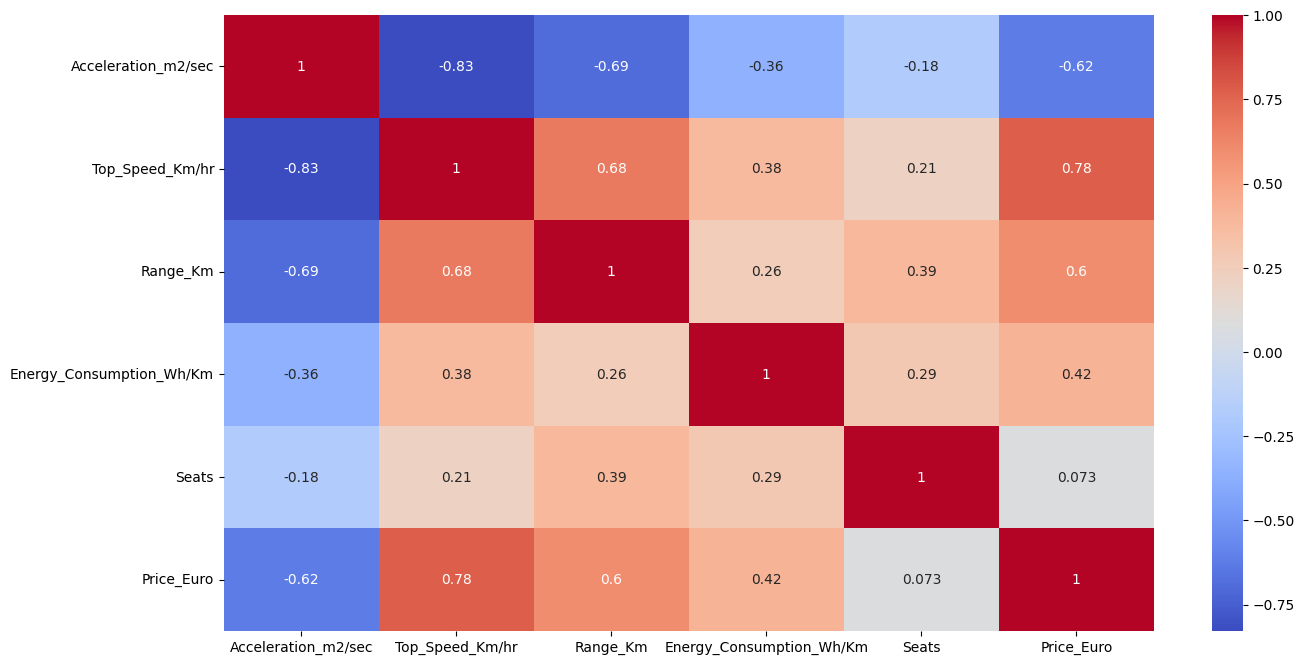

In [723]:
# plot heatmap of int and float values to check data correlation
df2= df[['Acceleration_m2/sec', 'Top_Speed_Km/hr', 'Range_Km', 'Energy_Consumption_Wh/Km', 'Seats', 'Price_Euro' ]]

plt.figure(figsize=(15,8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')


From heatmap it can be seen that EV range has strong correlation with vehicle price and top speed. In addition, the highest correlation exist between price and top speed which makes absolute sense becasue the fastest the vehicel comes with hefty price tag.

In [676]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

In [678]:
df.tail()

,Brand,Model,Acceleration_m2/sec,Top_Speed_Km/hr,Range_Km,Energy_Consumption_Wh/Km,Charge_Range_Km/hr,Fast_Charging,PowerTrain,Plug_Type,Body_Style,Segment,Seats,Price_Euro
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,Yes,AWD,Type 2 CCS,SUV,E,5,62000


In [721]:
df['Brand'].nunique()

33

In [722]:
df['Model'].nunique()

100

In [679]:
#count number of models each brand have
df['Brand'].value_counts()

Brand
Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: count, dtype: int64

In [680]:
df[df['Brand'].str.strip() == 'Tesla']


,Brand,Model,Acceleration_m2/sec,Top_Speed_Km/hr,Range_Km,Energy_Consumption_Wh/Km,Charge_Range_Km/hr,Fast_Charging,PowerTrain,Plug_Type,Body_Style,Segment,Seats,Price_Euro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
21,Tesla,Model Y Long Range Dual Motor,5.1,217,425,171,930,Yes,AWD,Type 2 CCS,SUV,D,7,58620
24,Tesla,Model 3 Long Range Performance,3.4,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480
33,Tesla,Cybertruck Tri Motor,3.0,210,750,267,710,Yes,AWD,Type 2 CCS,Pickup,N,6,75000
40,Tesla,Model S Long Range,3.8,250,515,184,560,Yes,AWD,Type 2,Liftback,F,5,79990
51,Tesla,Roadster,2.1,410,970,206,920,Yes,AWD,Type 2 CCS,Cabrio,S,4,215000
54,Tesla,Model X Long Range,4.6,250,450,211,490,Yes,AWD,Type 2,SUV,F,7,85990
59,Tesla,Model S Performance,2.5,261,505,188,550,Yes,AWD,Type 2,Liftback,F,5,96990
61,Tesla,Model Y Long Range Performance,3.7,241,410,177,900,Yes,AWD,Type 2 CCS,SUV,D,7,65620


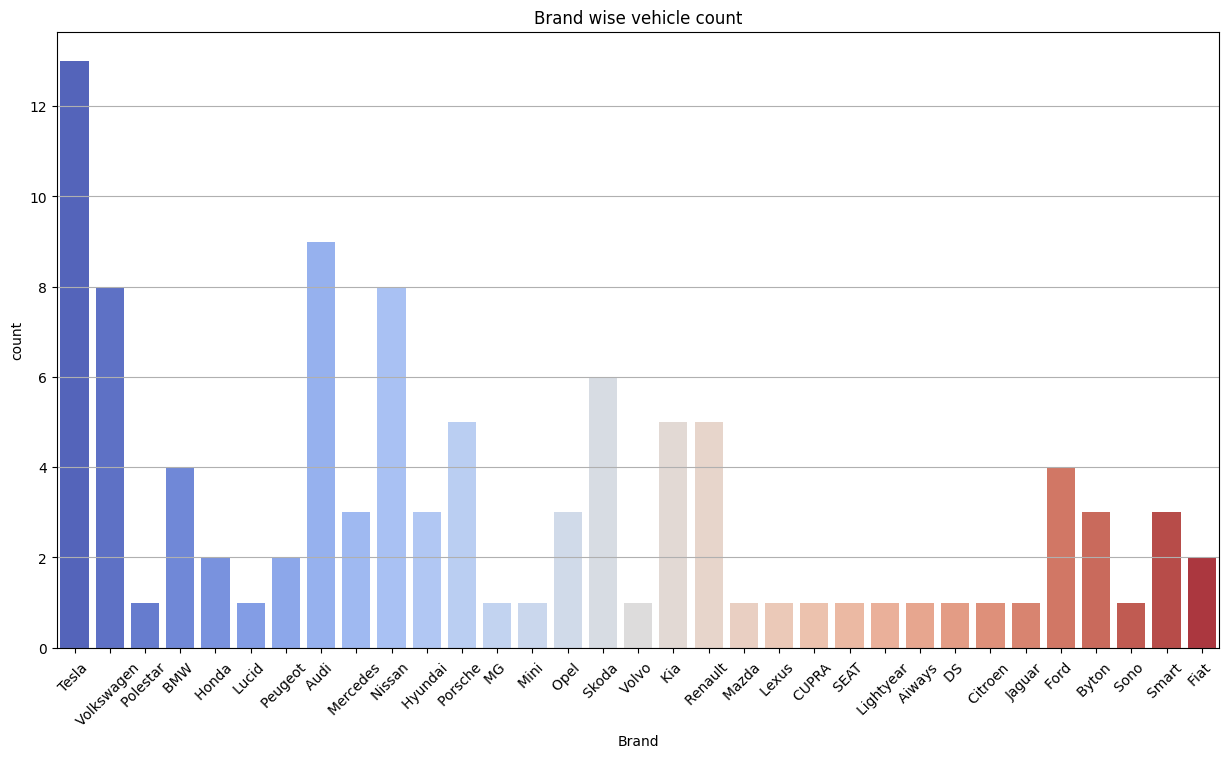

In [681]:
#plot the count of brand appears
plt.figure(figsize=(15,8))
sns.countplot(x='Brand', data=df, palette='coolwarm')
plt.xticks(rotation = 45)
plt.grid(axis='y')
plt.title('Brand wise vehicle count')
plt.show()
 
 

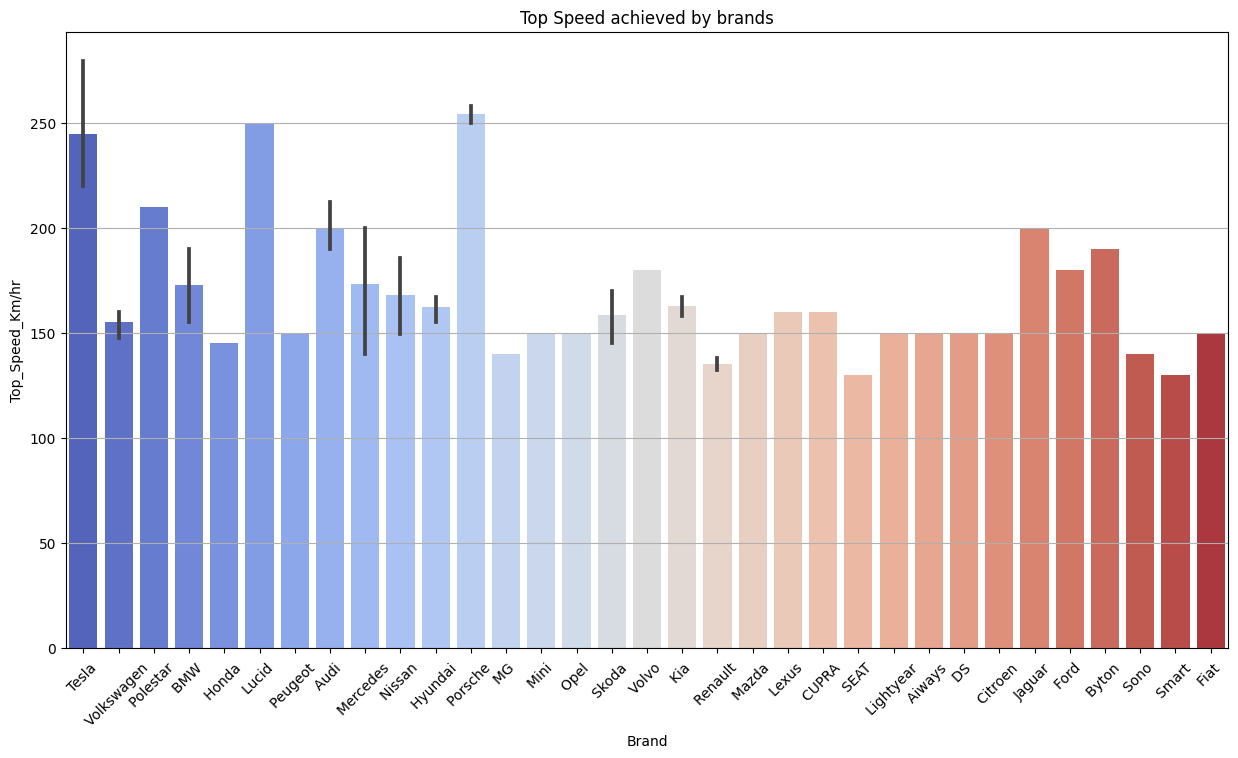

In [682]:
#display brands with respect to top speed
plt.figure(figsize=(15,8))
sns.barplot(x='Brand', y='Top_Speed_Km/hr', data=df, palette='coolwarm')
plt.xticks(rotation = 45)
plt.title('Top Speed achieved by brands')
plt.grid(axis='y')
plt.show()

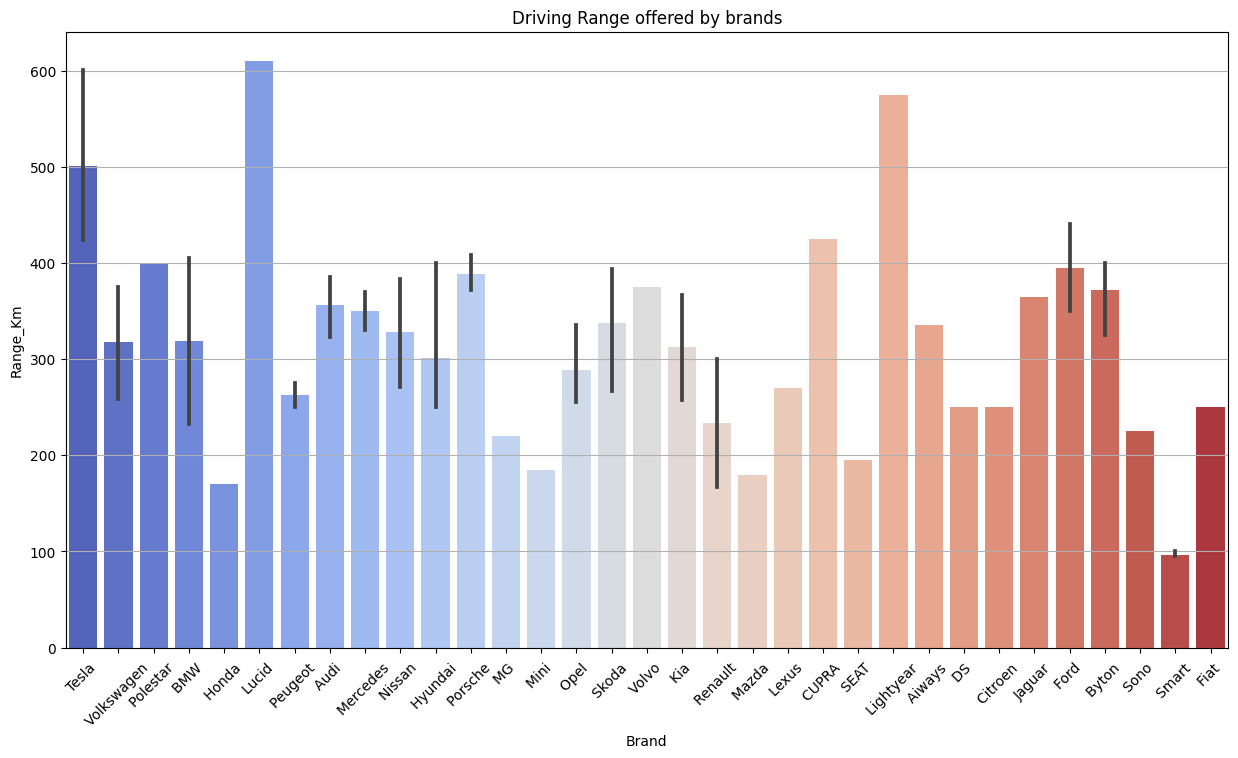

In [683]:
#display EV driving ranges of vehicle brands offer
plt.figure(figsize=(15,8))
sns.barplot(x='Brand', y='Range_Km', data=df, palette='coolwarm')
plt.xticks(rotation = 45)
plt.title('Driving Range offered by brands')
plt.grid(axis='y')
plt.show()
 

whisker represnts the deviation from mean value, in case of Tesla, we have 6 different models each with a different ev driving range where Model 3 with standard range plus offers 310 km of range while Roadster can go upto 970 km on a full charge.

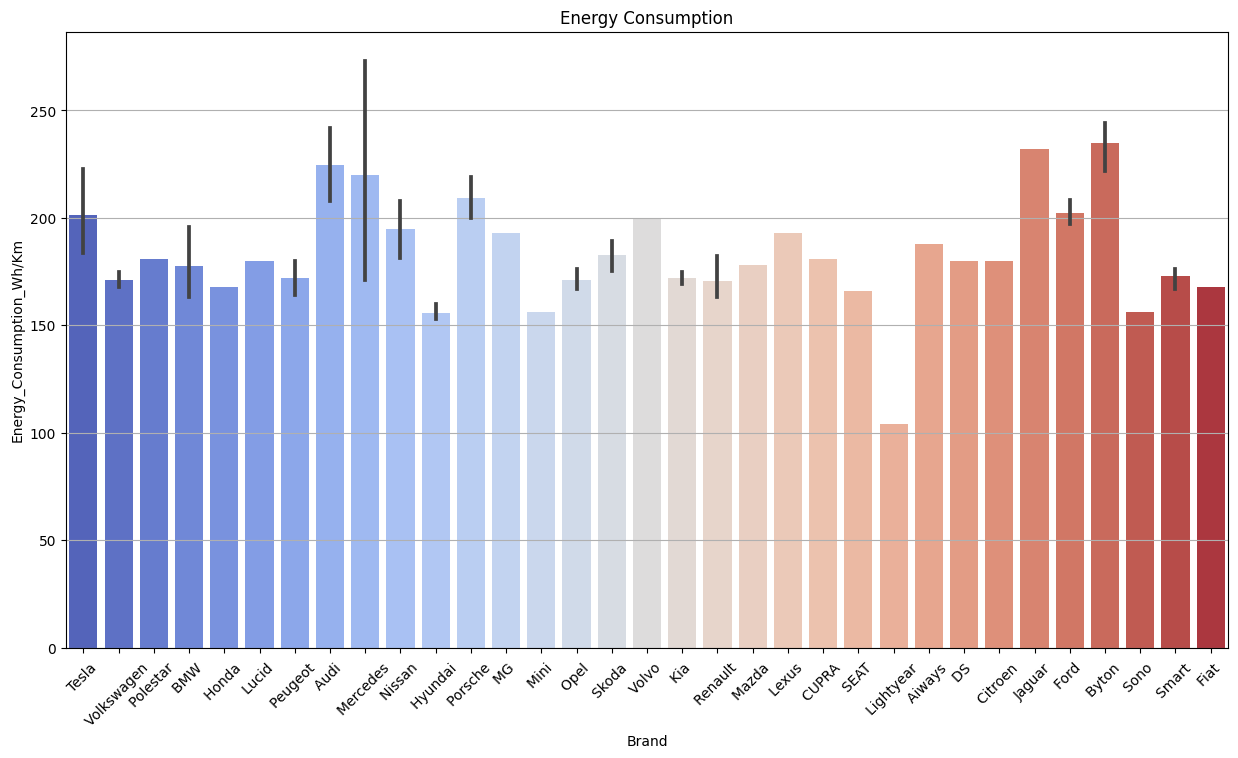

In [684]:
#display energy consumption of brands
plt.figure(figsize=(15,8))
sns.barplot(x='Brand', y='Energy_Consumption_Wh/Km', data=df, palette='coolwarm')
plt.xticks(rotation = 45)
plt.title('Energy Consumption')
plt.grid(axis='y')
plt.show()

The bar plot reprents energy required in watt hours to travel 1 km of distance, consumption depends on many factors such as vehicle weight, speed, driving behaviour and so on!

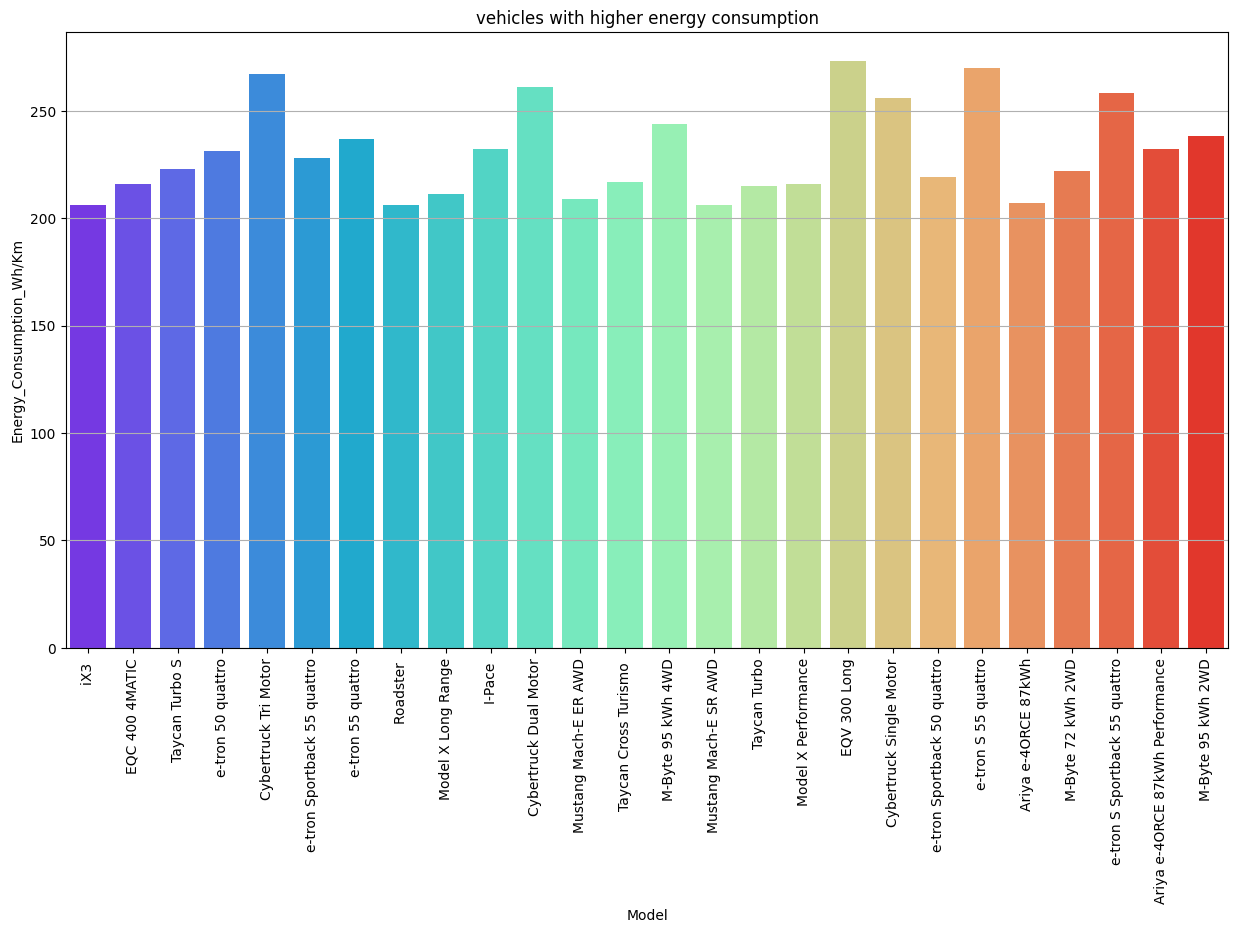

In [685]:
# display energy consumption of models having value > 200
plt.figure(figsize=(15,8))
sns.barplot(x='Model', y='Energy_Consumption_Wh/Km', data=df[df['Energy_Consumption_Wh/Km'] > 200], palette='rainbow')
plt.xticks(rotation = 90)
plt.title('vehicles with higher energy consumption')
plt.grid(axis='y')
plt.show()

In [686]:
df.head()

,Brand,Model,Acceleration_m2/sec,Top_Speed_Km/hr,Range_Km,Energy_Consumption_Wh/Km,Charge_Range_Km/hr,Fast_Charging,PowerTrain,Plug_Type,Body_Style,Segment,Seats,Price_Euro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [687]:
df.columns

Index(['Brand', 'Model', 'Acceleration_m2/sec', 'Top_Speed_Km/hr', 'Range_Km',
       'Energy_Consumption_Wh/Km', 'Charge_Range_Km/hr', 'Fast_Charging',
       'PowerTrain', 'Plug_Type', 'Body_Style', 'Segment', 'Seats',
       'Price_Euro'],
      dtype='object')

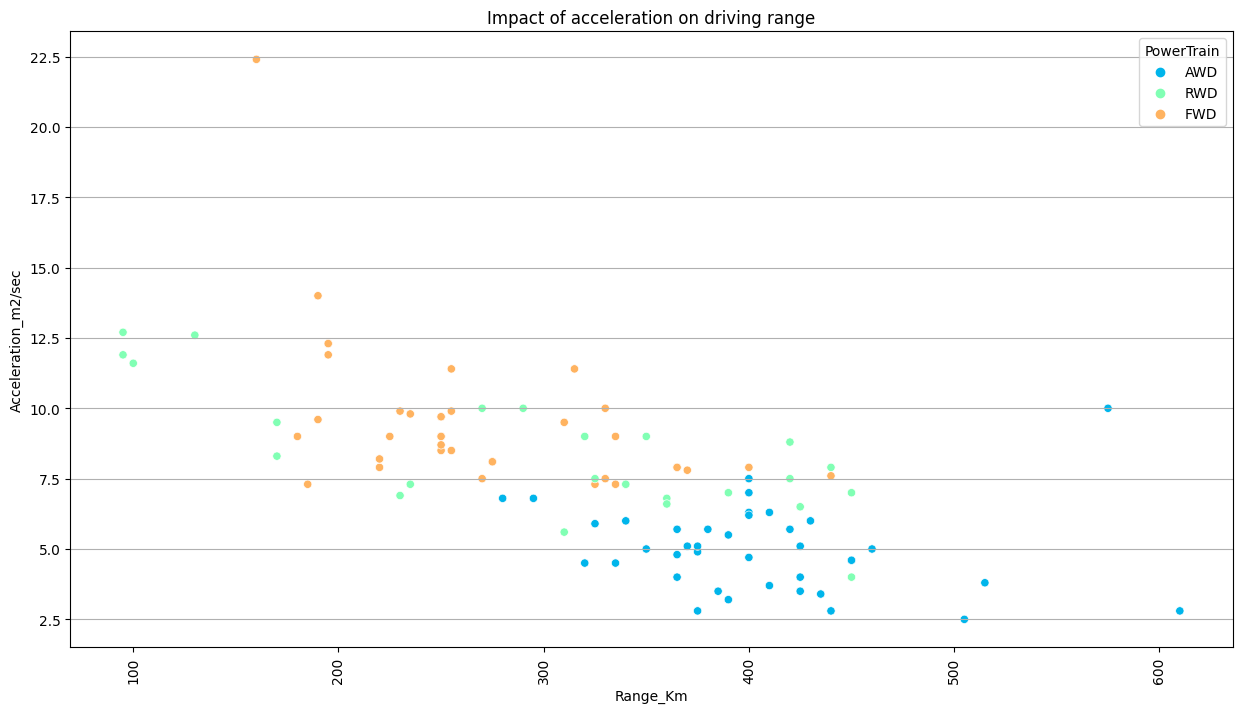

In [732]:
# plot accelration vs range
plt.figure(figsize=(15,8))
sns.scatterplot(y='Acceleration_m2/sec', x='Range_Km', hue='PowerTrain', data=df, palette='rainbow')
plt.xticks(rotation = 90)
plt.title('Impact of acceleration on driving range')
plt.grid(axis='y')
plt.show()


The graph gives clear understanding of negative relation of acceleration on vehicle range, which is also evident with negative correlation in heat map.

In [689]:
df.head()

,Brand,Model,Acceleration_m2/sec,Top_Speed_Km/hr,Range_Km,Energy_Consumption_Wh/Km,Charge_Range_Km/hr,Fast_Charging,PowerTrain,Plug_Type,Body_Style,Segment,Seats,Price_Euro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [690]:
df.isnull().sum()

Brand                       0
Model                       0
Acceleration_m2/sec         0
Top_Speed_Km/hr             0
Range_Km                    0
Energy_Consumption_Wh/Km    0
Charge_Range_Km/hr          0
Fast_Charging               0
PowerTrain                  0
Plug_Type                   0
Body_Style                  0
Segment                     0
Seats                       0
Price_Euro                  0
dtype: int64

In [691]:
df['Price_Euro'].describe()
 

count       103.000000
mean      55811.563107
std       34134.665280
min       20129.000000
25%       34429.500000
50%       45000.000000
75%       65000.000000
max      215000.000000
Name: Price_Euro, dtype: float64

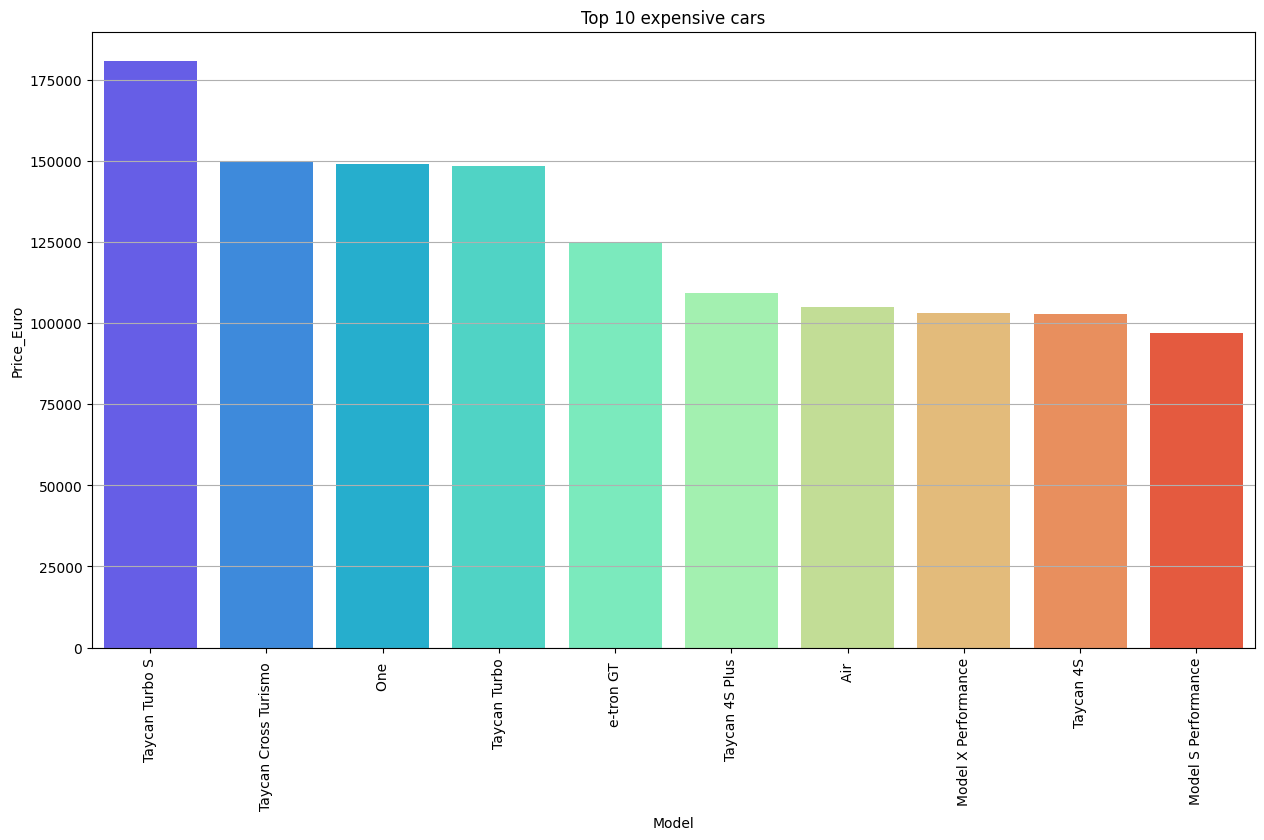

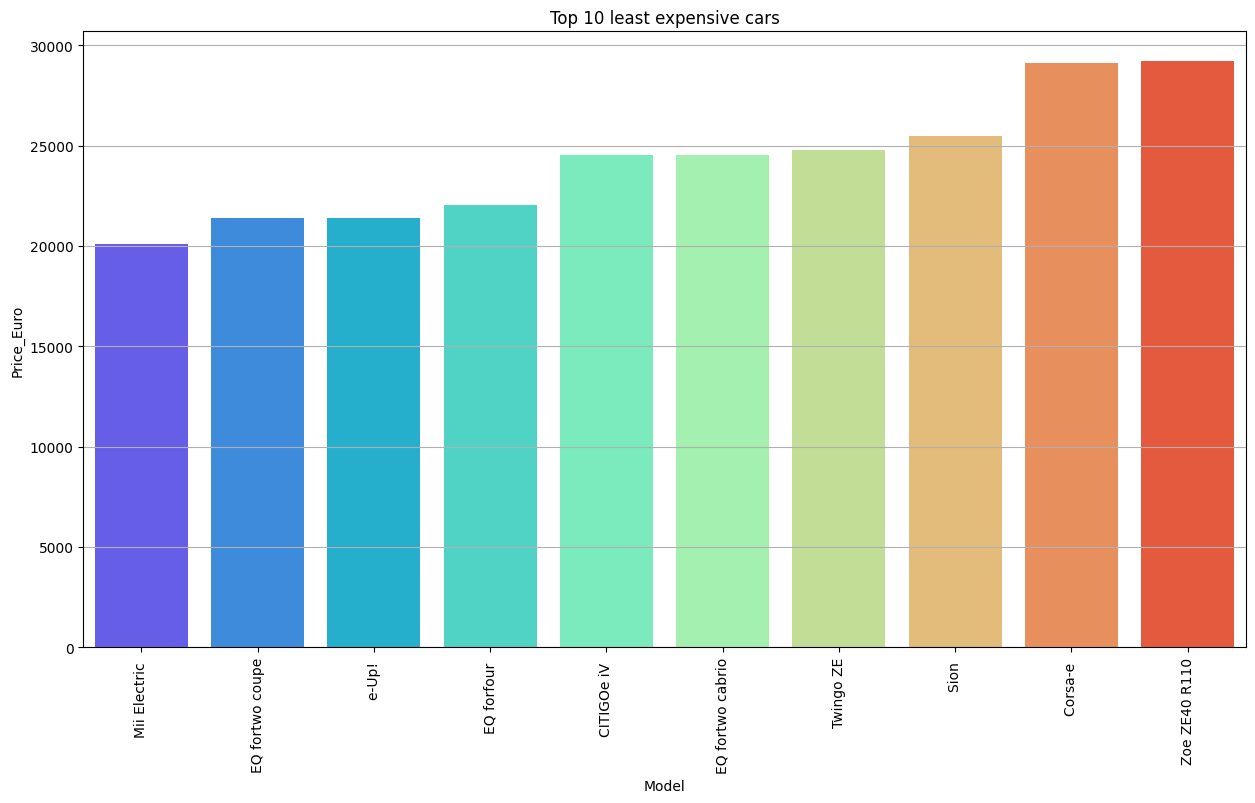

In [733]:
#display the price of top 10  expensive cars
plt.figure(figsize=(15,8))
sns.barplot(x='Model', y='Price_Euro', data=df.sort_values(by='Price_Euro', ascending=False).head(10), palette='rainbow')
plt.xticks(rotation = 90)
plt.title('Top 10 expensive cars')
plt.grid(axis='y')
plt.show()


#display the price of 10 least expensive cars
plt.figure(figsize=(15,8))
sns.barplot(x='Model', y='Price_Euro', data=df.sort_values(by='Price_Euro', ascending=True).head(10), palette='rainbow')
plt.xticks(rotation = 90)
plt.title('Top 10 least expensive cars')
plt.grid(axis='y')
plt.show()



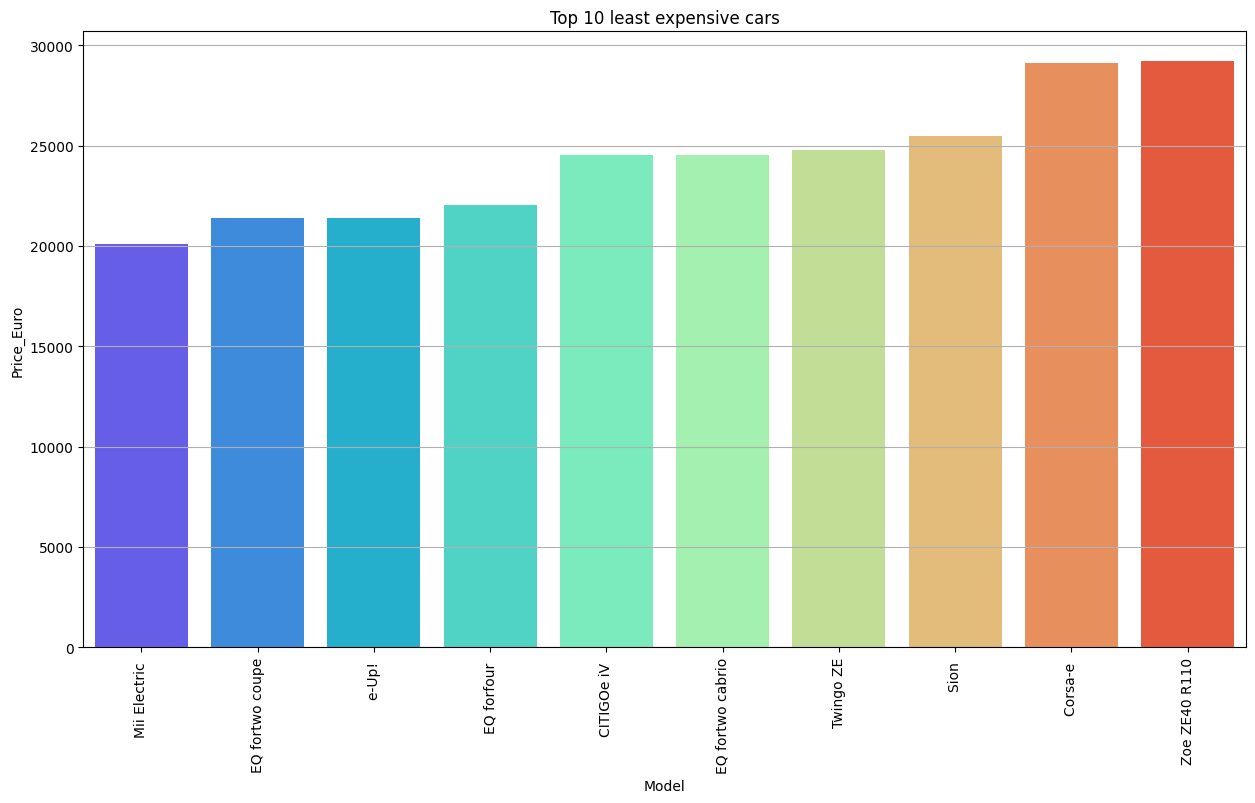

In [693]:
#display the price of 10 least expensive cars
plt.figure(figsize=(15,8))
sns.barplot(x='Model', y='Price_Euro', data=df.sort_values(by='Price_Euro', ascending=True).head(10), palette='rainbow')
plt.xticks(rotation = 90)
plt.title('Top 10 least expensive cars')
plt.grid(axis='y')
plt.show()
 

In [694]:
#display most number of sold cars
df['Model'].value_counts()

Model
e-Soul 64 kWh                    2
Model 3 Long Range Dual Motor    1
Mustang Mach-E ER RWD            1
Sion                             1
M-Byte 95 kWh 4WD                1
                                ..
e-Niro 64 kWh                    1
e-tron 50 quattro                1
e-2008 SUV                       1
i3 120 Ah                        1
M-Byte 95 kWh 2WD                1
Name: count, Length: 102, dtype: int64

In [695]:
df.columns

Index(['Brand', 'Model', 'Acceleration_m2/sec', 'Top_Speed_Km/hr', 'Range_Km',
       'Energy_Consumption_Wh/Km', 'Charge_Range_Km/hr', 'Fast_Charging',
       'PowerTrain', 'Plug_Type', 'Body_Style', 'Segment', 'Seats',
       'Price_Euro'],
      dtype='object')

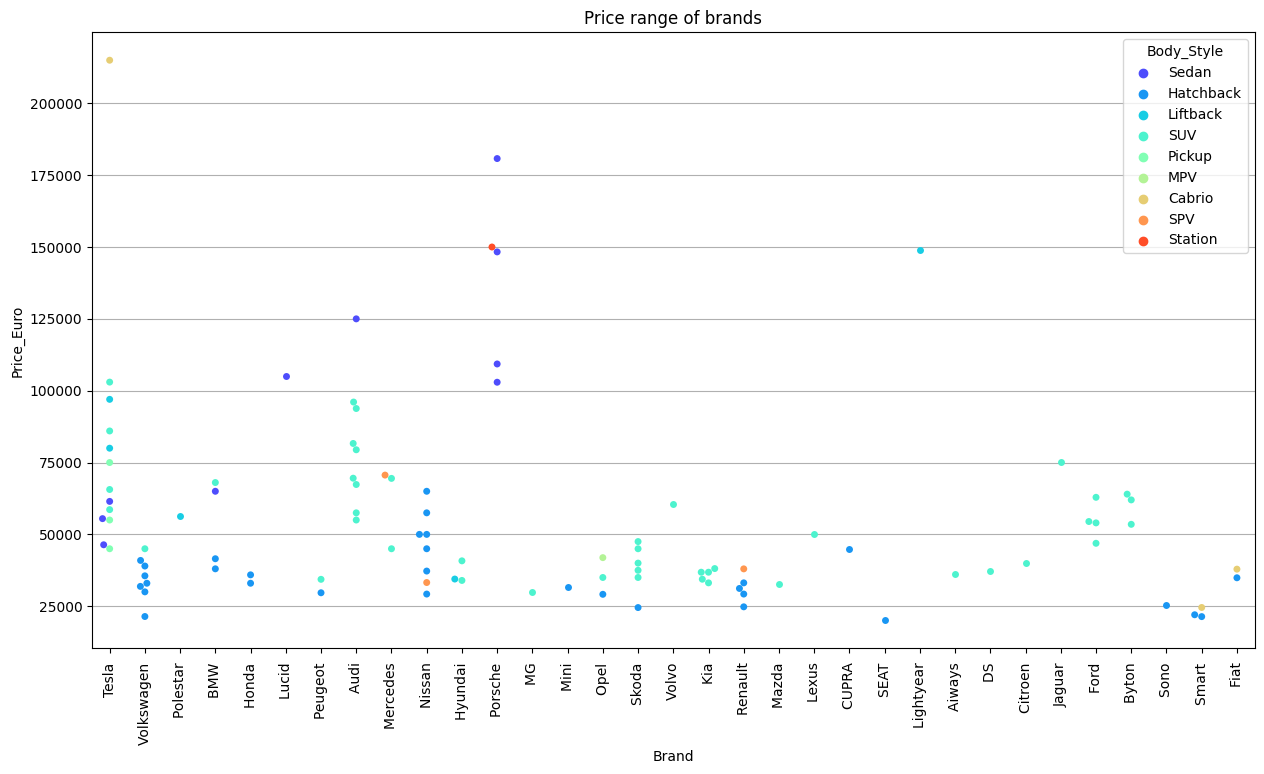

In [696]:
#plot suitable swarmplot
plt.figure(figsize=(15,8))
sns.swarmplot(x='Brand', y='Price_Euro', hue='Body_Style', data=df, palette='rainbow')
plt.xticks(rotation = 90)
plt.title('Price range of brands')
plt.grid(axis='y')
plt.show()

 

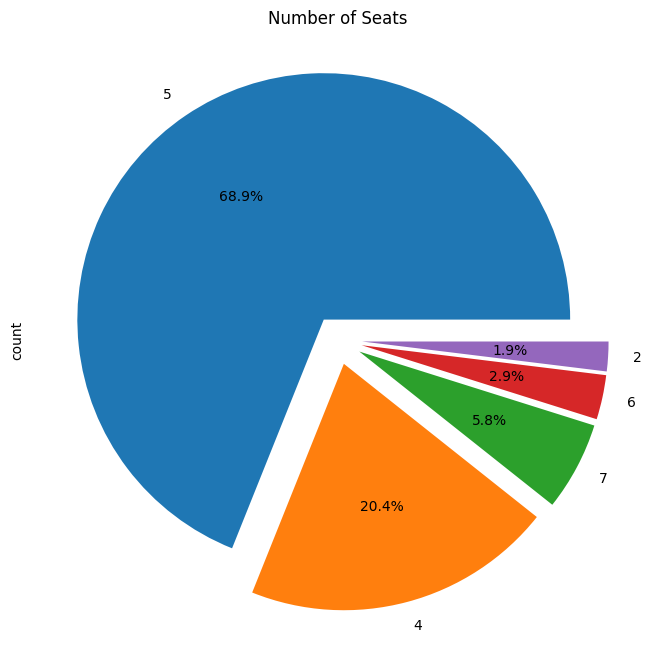

In [697]:
#display a pie chart of seats
plt.figure(figsize=(15,8))
df['Seats'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.1,0.1,0.1,0.1,0.1])
plt.title('Number of Seats')
plt.show()
 

Sedans are the most popular choice among different car catagories.

# Applying Linear Regression model to predict EV price

In [698]:
df.columns

Index(['Brand', 'Model', 'Acceleration_m2/sec', 'Top_Speed_Km/hr', 'Range_Km',
       'Energy_Consumption_Wh/Km', 'Charge_Range_Km/hr', 'Fast_Charging',
       'PowerTrain', 'Plug_Type', 'Body_Style', 'Segment', 'Seats',
       'Price_Euro'],
      dtype='object')

<Axes: >

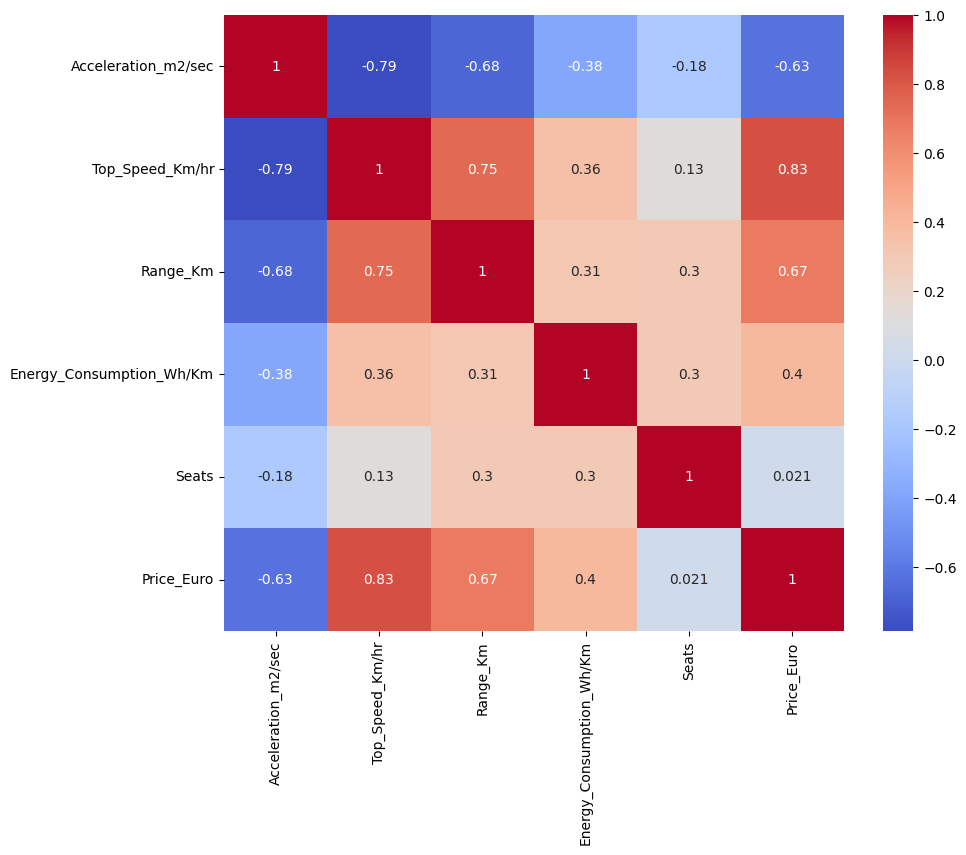

In [699]:
# correlation matrix
df2= df[['Acceleration_m2/sec', 'Top_Speed_Km/hr', 'Range_Km',
       'Energy_Consumption_Wh/Km', 'Seats', 'Price_Euro' ]]

plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
 

from the correlation matrix it can be seen that EV price has strong correlation with range and top speed, therefore later two are used to predict EV price

In [717]:
#import scikit libraires
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Model prediction depends on the data distribution, if the data is not normallly distributed, the predictions will have higher inaccuracies

In the following section, box plots are used to visualize outliers in the data and susbsequently remove them

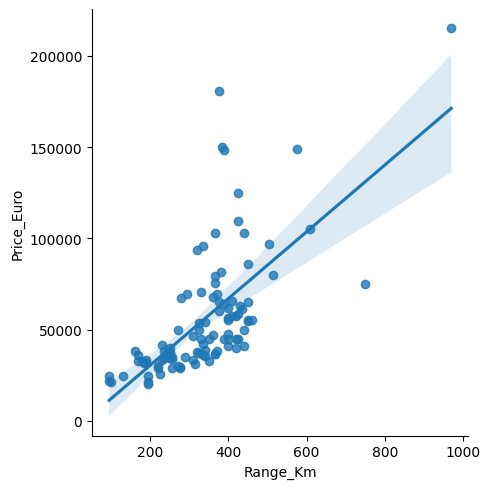

In [701]:
sns.lmplot(x='Range_Km', y='Price_Euro', data=df)

<Axes: ylabel='Range_Km'>

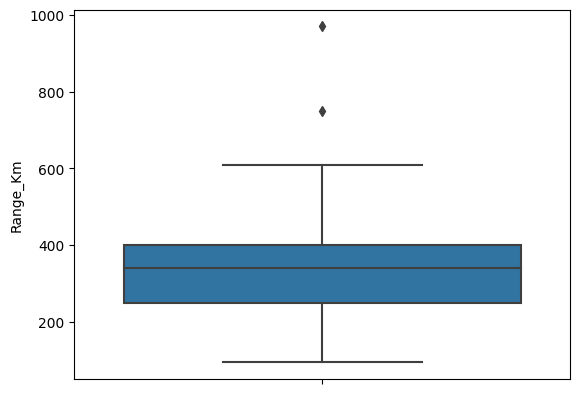

In [702]:
sns.boxplot(y='Range_Km', data=df)

since the vehicle range has some outliers they are removed to make predictions accurate

<Axes: ylabel='Range_Km'>

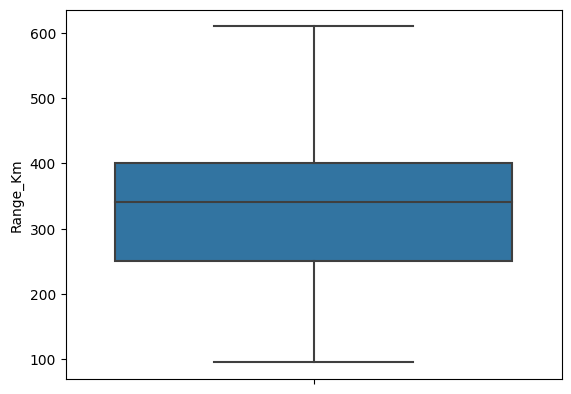

In [710]:
# remove outliers and plot data
df = df[df['Range_Km'] < 700]
sns.boxplot(y='Range_Km', data=df)

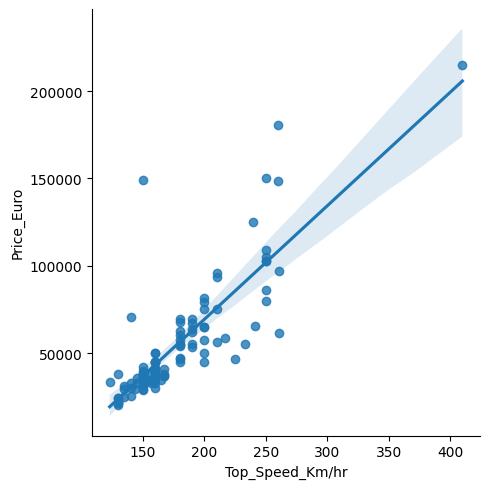

In [704]:
#data distribution of speed
sns.lmplot(x='Top_Speed_Km/hr', y='Price_Euro', data=df)

<Axes: ylabel='Top_Speed_Km/hr'>

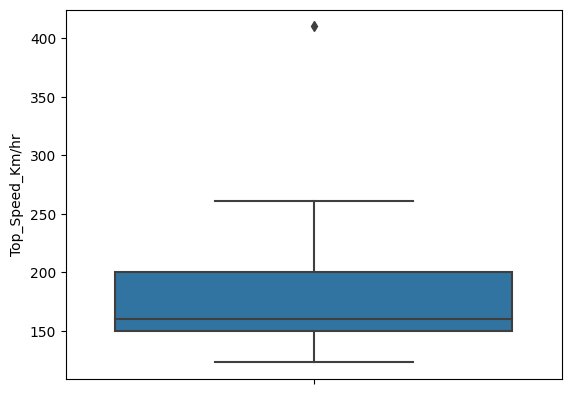

In [705]:
sns.boxplot(y='Top_Speed_Km/hr', data=df)

<Axes: ylabel='Top_Speed_Km/hr'>

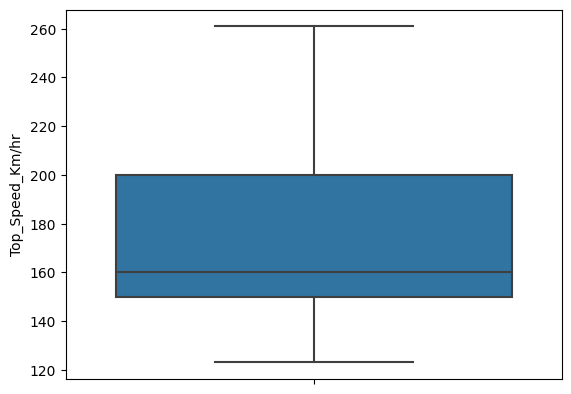

In [709]:
# remove outliers and plot data
df = df[df['Top_Speed_Km/hr'] < 400]
sns.boxplot(y='Top_Speed_Km/hr', data=df)

### train the model with 70% data and test the predictions on remaining 30%

In [711]:
#Assign independent and dependet variables
x = df[['Top_Speed_Km/hr', 'Range_Km']]  # independent variable
y = df['Price_Euro'] #dependent variable

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

#call model
model = LinearRegression()

#rain the model
model.fit(x_train, y_train)


In [712]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

#call model
model = LinearRegression()

#rain the model
model.fit(x_train, y_train)



LinearRegression()

In [735]:
#make predictions
prediction = model.predict(x_test)
print("Predicted EV price: ", prediction)


Predicted EV price:  [ 60794.50910277  18766.04997395  19256.54383545  64299.63392408
  43144.86394659 101684.92073209  43478.29803158  53044.0967278
  59041.94669212  88718.70373223  28790.93057637  55432.11535314
  68805.06100036  29562.50526402  95008.10517447  26547.87430422
  47859.70405821  47859.70405821  56111.08094645  53482.23733047
  56413.10307614  13560.71600082  48735.98526354  22323.52805409
  90293.26506284  56622.51611148  38272.96405845  29229.07117903
  61670.7903081   46983.42285289  30501.61037995]


In [720]:
#check rscore
R2_score = r2_score(y_test, prediction)

print("R_squared score: ", R2_score*100)


R_squared score:  61.172676269309065


R-squared measures the proportion of the variance in the dependent variable that can be explained by the independent variables in the model. It ranges from 0 to 100%, where a higher value indicates a better fit. The model in this example has around 62% r_squared score which indicates only 62% of the price predictions are accurate which is very low.